# House Sales in King County Analysis

<br>
<br>

The purpose of this project is to analyse the House Sales in king count and develop a model that can predict 
the price using the regression method using python.The dataset used is [kc_house_data.csv](https://www.kaggle.com/datasets/shivachandel/kc-house-data) from kaggle.

### Importing data and getting to know it

In [217]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [101]:
file_name='kc_house_data.csv'
fdata=pd.read_csv(file_name)

We check the structure of the dataset

In [102]:
fdata.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Checking the data type


In [103]:
fdata.dtypes


id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

<br>

Checking the number or rows and columns


In [104]:
print(f"{len(fdata)} rows")


21613 rows


In [105]:
print(f"{len(fdata.columns)} Columns")

21 Columns


In [106]:
fdata.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<br>
<br>

Checking for duplicates:

In [107]:
fdata.duplicated().sum()

0

After all this we can conclude that there is no null or na in or dataset and there is no duplicated values so we can proceed to analyze the data

### Analysing the data

<br>



we run the describe fuction to see some statistic like average price,bedrooms,sqft,etc...


In [108]:
fdata.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<br>
<br>

we now check which is most correlated with the price, as we can see what most influence in the price is the sqft of the living room and the grade of
 the house.

In [109]:
fdata.corr()['price'].sort_values(ascending=False) 

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

<br>
<br>

Simple heatmap showing the correlation of the other variables with the price

<AxesSubplot:>

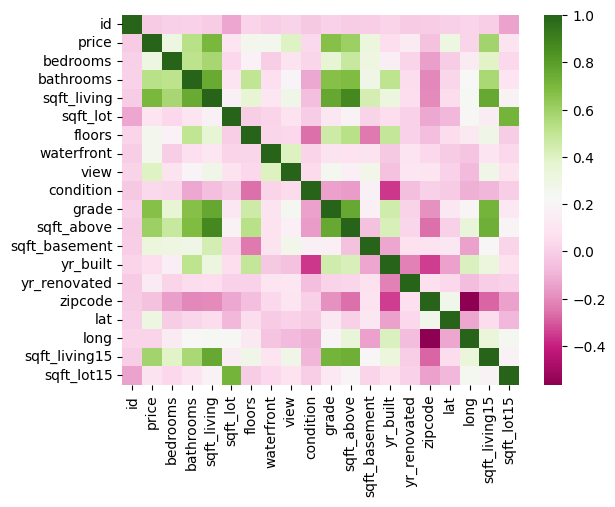

In [110]:

sns.heatmap(fdata.corr(),cmap='PiYG')


<br>

### Model development


<br>

As we have seen what has more correlation to the price is the sqft_living, the square meter of the living room so make sense to create a model to predict the price acording this feature.

##### Regression method

In [268]:
df=pd.DataFrame(fdata)
t=df[['sqft_living']]
p=df['price']
lm=LinearRegression()
lm.fit(t,p)
ppred=lm.predict(t)



In [238]:
lm.intercept_

-43580.743094473146

In [239]:
lm.coef_

array([280.6235679])

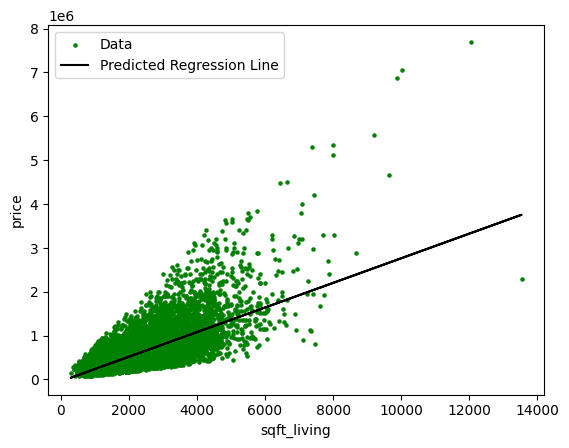

In [292]:
plt.scatter(t,p,color='green',s=5,label='Data')
plt.plot(t,ppred,color='black',label='Predicted Regression Line') 
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.legend()

<br>
the model we got is:
 


*price = 280.62 * sqft_living - 43580*
 

<br>

##### R-Squared method

<br>

In [269]:
lm.score(t,p)

0.4928532179037931

The R-squared method range between 0 to 1 (1 is perfect fit) and tell us how well fitted is or linear predicction, in this case is **0.49** 

As we can see if we use this formula to predict the price it get close but it is not accurate so we need to add more variables to get a more accurate price prediction.

<br>

Lets try to add more features or variables to the ecuation:

In [260]:
df=pd.DataFrame(fdata)
x=df[['sqft_living','grade','sqft_above','bathrooms']]
y=df['price']
lm.fit(x,y)
yhat=lm.predict(x)

In [231]:
lm.intercept_

-650233.6080463672

In [232]:
lm.coef_

array([ 2.52529201e+02,  1.15052849e+05, -7.68775596e+01, -3.70593962e+04])

the model we got is :

*price = 252.53 * sqft_living + 115052.85 * grade - 76.87 * sqft_above - 37059 * bathrooms - 650233.60*

<br>

R-squared method:

In [266]:
lm.score(x,y)

0.5435423397100239

As we can see the more variables we add the close to 1 the R-Squared it gets and the best fit we get,in this case, **0.54**

<br>
<br>

Now we will include **all the features or variables**:

In [286]:
df=pd.DataFrame(fdata)
x=df[['sqft_living','grade','sqft_above','bathrooms','condition','view','waterfront','bedrooms','sqft_lot','long','floors','sqft_living15','sqft_basement','lat','sqft_lot15','zipcode','yr_renovated','yr_built','id']]
y=df['price']
lm.fit(x,y)
yhat=lm.predict(x)

In [287]:
lm.score(x,y)

0.6998463505666612

As we can see we have increase the score to ~ **0.7**

### Conclusion

After looking all the result we discovered, we draw to the conclusion that 2nd degree polynomial(using all the variables) is the best 
to create a regression model at this ocasion, however, even knowing that the model has a great accuracy it is not perfect and further analysis with different methods should apply.
 